In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [63]:
df = pd.read_csv("houseprices.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [64]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1357,1358,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400
957,958,20,RL,70.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,132000
1418,1419,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,COD,Normal,124000
955,956,90,RH,82.0,7136,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,145000


In [65]:
df = df.select_dtypes(include=['number'])
df = df.fillna(df.median(numeric_only=True))

<Axes: >

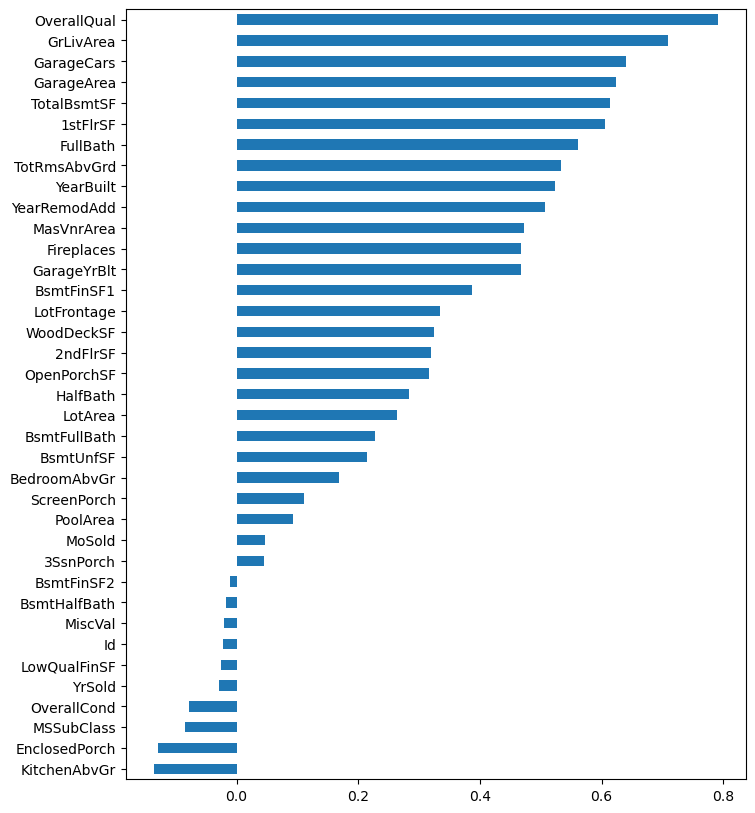

In [66]:
corr = df.corr(numeric_only=True)['SalePrice'].drop('SalePrice').sort_values()

corr.plot(kind="barh", figsize=(8,10))

In [73]:
y = np.array(df['SalePrice'])
#X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
X = df.drop('SalePrice', axis=1)
#X = df.drop(columns=['SalePrice', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [84]:
rmse_results = []
depths = range(1, 101)

for depth in depths:
    regr = DecisionTreeRegressor(max_depth=depth, random_state=42)
    regr.fit(X_train_scaled, y_train)
    
    y_pred = regr.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    rmse_results.append(rmse)
    print(f"Depth: {depth} | RMSE: {rmse:.4f}")

best_depth = depths[np.argmin(rmse_results)]
print(f"\n--- Best Max Depth: {best_depth} with RMSE: {min(rmse_results):.4f} ---")

Depth: 1 | RMSE: 65179.1782
Depth: 2 | RMSE: 50731.0277
Depth: 3 | RMSE: 41502.5110
Depth: 4 | RMSE: 38690.1654
Depth: 5 | RMSE: 38865.2864
Depth: 6 | RMSE: 37168.8798
Depth: 7 | RMSE: 36449.6430
Depth: 8 | RMSE: 36561.7357
Depth: 9 | RMSE: 37824.9559
Depth: 10 | RMSE: 39935.5727
Depth: 11 | RMSE: 36715.3233
Depth: 12 | RMSE: 39463.7981
Depth: 13 | RMSE: 42549.4977
Depth: 14 | RMSE: 38818.0951
Depth: 15 | RMSE: 43224.6195
Depth: 16 | RMSE: 39187.1892
Depth: 17 | RMSE: 39995.2560
Depth: 18 | RMSE: 39169.1261
Depth: 19 | RMSE: 39663.5684
Depth: 20 | RMSE: 40147.7414
Depth: 21 | RMSE: 39649.9758
Depth: 22 | RMSE: 40582.7498
Depth: 23 | RMSE: 40204.6561
Depth: 24 | RMSE: 40204.6561
Depth: 25 | RMSE: 40204.6561
Depth: 26 | RMSE: 40204.6561
Depth: 27 | RMSE: 40204.6561
Depth: 28 | RMSE: 40204.6561
Depth: 29 | RMSE: 40204.6561
Depth: 30 | RMSE: 40204.6561
Depth: 31 | RMSE: 40204.6561
Depth: 32 | RMSE: 40204.6561
Depth: 33 | RMSE: 40204.6561
Depth: 34 | RMSE: 40204.6561
Depth: 35 | RMSE: 40204

In [92]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
best_score = best_regr.score(X_test_scaled, y_test)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {best_score}")
print(f"Optimized RMSE: {best_rmse}")

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10}
Best Score: 0.7879065480366052
Optimized RMSE: 40333.930665974156


In [94]:
def plot_best_tree_curve(X_orig, y_orig, model, scaler, target_feature, poly=None):
    x_min, x_max = X_orig[target_feature].min(), X_orig[target_feature].max()
    x_grid = np.linspace(x_min, x_max, 300)

    grid_df = pd.DataFrame([X_orig.mean().values] * 300, columns=X_orig.columns)
    grid_df[target_feature] = x_grid

    grid_transformed = scaler.transform(grid_df) 
    if poly is not None:
        grid_transformed = poly.transform(grid_transformed)
    
    y_pred_grid = model.predict(grid_transformed)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_orig[target_feature], y_orig, color='red', alpha=0.3, label='Actual Data', s=15)
    plt.plot(x_grid, y_pred_grid, color='blue', linewidth=2.5, label='Decision Tree Prediction')
    
    plt.title(f"Best Decision Tree Fit: {target_feature} vs Target")
    plt.xlabel(target_feature)
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

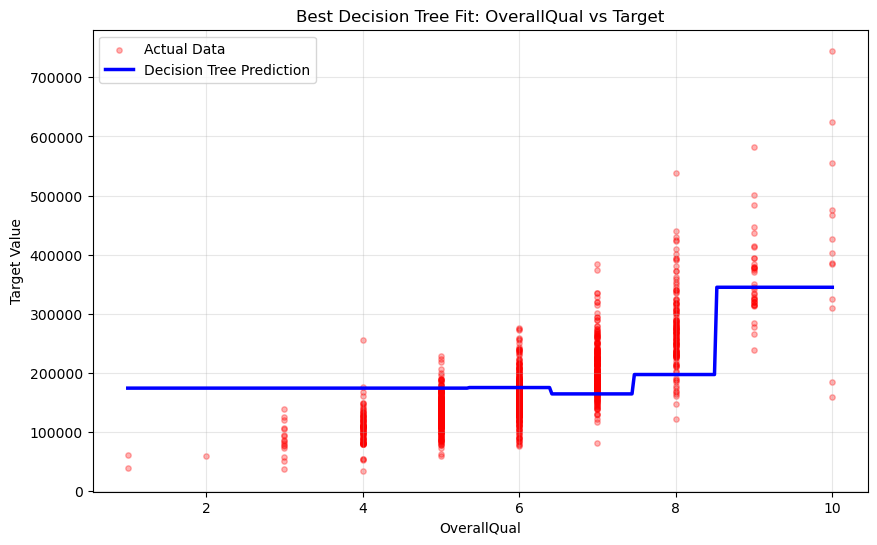

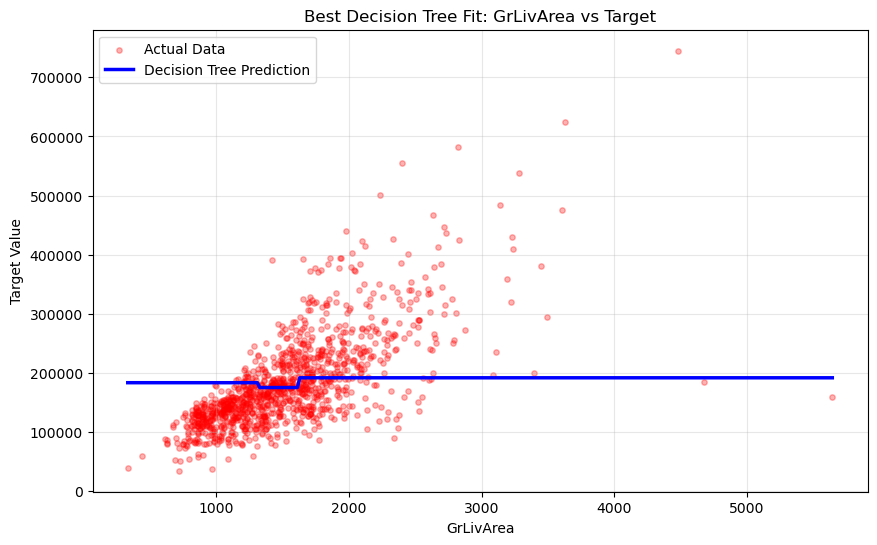

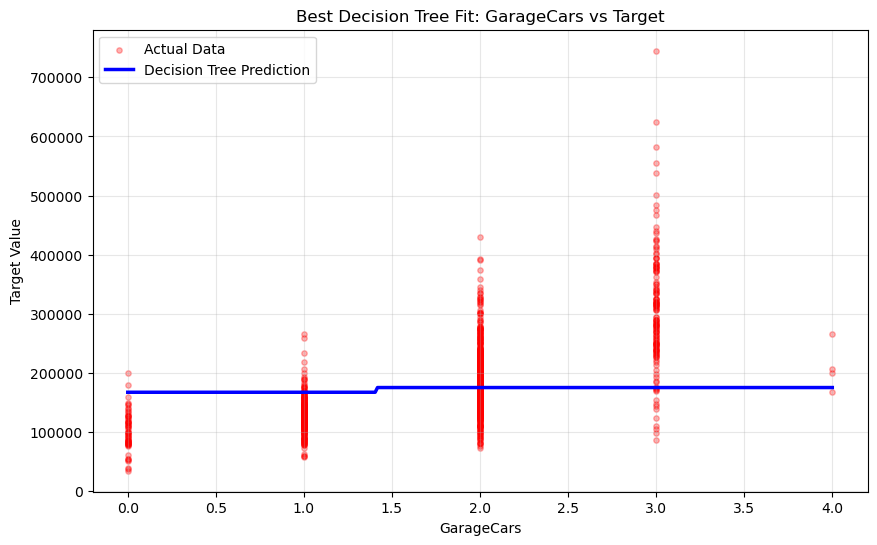

In [95]:
plot_best_tree_curve(
    X_orig=X_train,
    y_orig=y_train,
    model=best_model,
    scaler=scaler,
    target_feature='OverallQual', 
    poly=None
)
plot_best_tree_curve(
    X_orig=X_train,
    y_orig=y_train,
    model=best_model,
    scaler=scaler,
    target_feature='GrLivArea', 
    poly=None
)
plot_best_tree_curve(
    X_orig=X_train,
    y_orig=y_train,
    model=best_model,
    scaler=scaler,
    target_feature='GarageCars', 
    poly=None
)